In [1]:
import numpy as np

# Paths to the .npy files
training_features_path = r"C:\Users\ASUS\Desktop\Project\Features\train_features_combined (1).npy"
training_labels_path = r"C:\Users\ASUS\Desktop\Project\Features\train_labels_combined.npy"
validation_features_path = r"C:\Users\ASUS\Desktop\Project\Features\val_features_combined.npy"
validation_labels_path = r"C:\Users\ASUS\Desktop\Project\Features\val_labels_combined.npy"

# Loading the training features and labels
training_features = np.load(training_features_path)
training_labels = np.load(training_labels_path)

# Loading the validation features and labels
validation_features = np.load(validation_features_path)
validation_labels = np.load(validation_labels_path)

# Print out the shapes to confirm
print(f"Training features shape: {training_features.shape}")


Training features shape: (134823, 2048)


In [7]:
training_features[:10]

array([[0.11895339, 0.59216315, 0.24101752, ..., 0.03185902, 0.06923218,
        0.30530372],
       [0.12918943, 0.01007799, 0.8963649 , ..., 0.6081784 , 0.03992908,
        0.5941267 ],
       [0.2874102 , 0.25965416, 0.2726573 , ..., 0.47250623, 0.15790576,
        1.099446  ],
       ...,
       [0.56224006, 0.5510011 , 0.2890889 , ..., 0.5714624 , 0.18647261,
        0.13953829],
       [0.5049945 , 0.32157093, 0.1149824 , ..., 0.10408802, 0.4743373 ,
        0.30696803],
       [0.8477429 , 0.24703696, 1.0683957 , ..., 0.37135956, 1.0862874 ,
        0.39525288]], dtype=float32)

In [11]:
training_labels[:10]

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32)

In [13]:
class_counts = np.sum(training_labels, axis=0)

# Print the count of samples in each class
for class_index, count in enumerate(class_counts):
    print(f"Class {class_index}: {int(count)} samples")

Class 0: 105344 samples
Class 1: 12070 samples
Class 2: 5021 samples
Class 3: 4349 samples
Class 4: 486 samples
Class 5: 7553 samples


In [18]:
# Assuming training_labels and validation_labels are in one-hot encoded format

# For training labels
binary_training_labels = np.argmax(training_labels, axis=1) > 0
binary_training_labels = binary_training_labels.astype(int)

# For validation labels
binary_validation_labels = np.argmax(validation_labels, axis=1) > 0
binary_validation_labels = binary_validation_labels.astype(int)

# Convert labels back to one-hot encoding for use with categorical_crossentropy
binary_training_labels = to_categorical(binary_training_labels, num_classes=2)
binary_validation_labels = to_categorical(binary_validation_labels, num_classes=2)


In [19]:
class_counts = np.sum(binary_training_labels, axis=0)

# Print the count of samples in each class
for class_index, count in enumerate(class_counts):
    print(f"Class {class_index}: {int(count)} samples")

Class 0: 105344 samples
Class 1: 29479 samples


In [4]:
pip install -U scikit-learn imbalanced-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/7b/0e/25d6b5678ed3c7e12bc94d047d0e9492e89cc78b7ea0034ac0f1cf2ff304/scikit_learn-1.4.1.post1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/6e/1b/66764ecf370e797759be06fb38c11640ea1f9456ae10f8640a33cfa726ea/imbalanced_learn-0.12.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.6 MB 2.6 MB/s eta 0:00:05
   -- ------------------------------------- 0.6/10.6 MB 7.5 MB/s eta 0:00:02
   --- ------------------------------------ 1.1/10.6 MB 9.5 MB/s eta 0:00:02
   ----- ---------------------------------- 1.5/10.6 MB 9.8 MB/s eta 0:00:01
   ------- -------------------------------- 2.0/10.6 MB 9.9 MB/s eta 0:00:01
   --------- ------------------------------ 2.6/10.6 MB 10.4 MB/s eta 0:00:01
   ----------- ----------

In [6]:
import numpy as np

# Count the number of samples in each class for the training set
unique_classes_training, counts_training = np.unique(training_labels, return_counts=True)
for class_label, count in zip(unique_classes_training, counts_training):
    print(f"Training Class {class_label}: {count} samples")

# Count the number of samples in each class for the validation set
unique_classes_validation, counts_validation = np.unique(validation_labels, return_counts=True)
for class_label, count in zip(unique_classes_validation, counts_validation):
    print(f"Validation Class {class_label}: {count} samples")


Training Class 0.0: 674115 samples
Training Class 1.0: 134823 samples
Validation Class 0.0: 25000 samples
Validation Class 1.0: 5000 samples


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

# Assuming training_features, training_labels, validation_features, and validation_labels are already loaded

# Convert multi-class labels to binary classification format
binary_training_labels = np.argmax(training_labels, axis=1) > 0
binary_training_labels = binary_training_labels.astype(int)
binary_validation_labels = np.argmax(validation_labels, axis=1) > 0
binary_validation_labels = binary_validation_labels.astype(int)

# Convert binary labels back to one-hot encoding
binary_training_labels = to_categorical(binary_training_labels, num_classes=2)
binary_validation_labels = to_categorical(binary_validation_labels, num_classes=2)

# Define the MLP model for binary classification
model = Sequential([
    Dense(1024, input_shape=(2048,), activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(2, activation='softmax')  
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',  # Adjusted for binary classification
              metrics=['accuracy', AUC(name='auc')])

# Compute class weights for binary classification
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(np.argmax(binary_training_labels, axis=1)),
    y=np.argmax(binary_training_labels, axis=1)
)
class_weight_dict = dict(enumerate(class_weights))

# Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=0.0001
)



# Train the model with binary labels
history = model.fit(
    training_features, 
    binary_training_labels,
    validation_data=(validation_features, binary_validation_labels),
    epochs=30,  
    batch_size=64,  
    callbacks=[early_stopping, reduce_lr],
    class_weight=class_weight_dict  
)


Epoch 1/30
2107/2107 [==============================] - 33s 15ms/step - loss: 1.2069 - accuracy: 0.5314 - auc: 0.5381 - val_loss: 0.7841 - val_accuracy: 0.5148 - val_auc: 0.5229 - lr: 0.0010
Epoch 2/30
2107/2107 [==============================] - 32s 15ms/step - loss: 0.7778 - accuracy: 0.5364 - auc: 0.5440 - val_loss: 0.7728 - val_accuracy: 0.5204 - val_auc: 0.5231 - lr: 0.0010
Epoch 3/30
2107/2107 [==============================] - 31s 15ms/step - loss: 0.7674 - accuracy: 0.5437 - auc: 0.5522 - val_loss: 0.7630 - val_accuracy: 0.5044 - val_auc: 0.5152 - lr: 0.0010
Epoch 4/30
2107/2107 [==============================] - 31s 15ms/step - loss: 0.7550 - accuracy: 0.5471 - auc: 0.5553 - val_loss: 0.7505 - val_accuracy: 0.5252 - val_auc: 0.5421 - lr: 0.0010
Epoch 5/30
2107/2107 [==============================] - 32s 15ms/step - loss: 0.7440 - accuracy: 0.5480 - auc: 0.5580 - val_loss: 0.7385 - val_accuracy: 0.5444 - val_auc: 0.5716 - lr: 0.0010
Epoch 6/30
2107/2107 [=======================

157/157 [==============================] - 0s 2ms/step


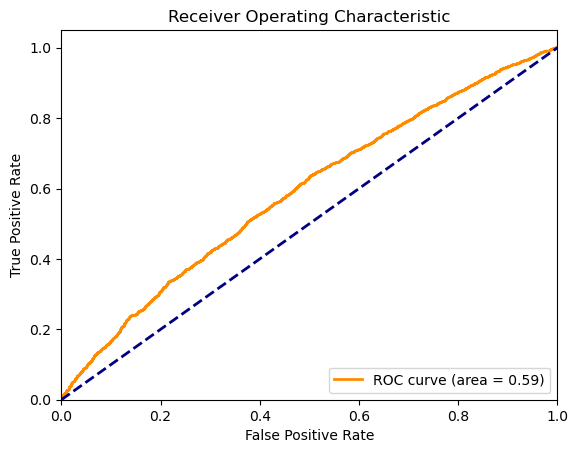

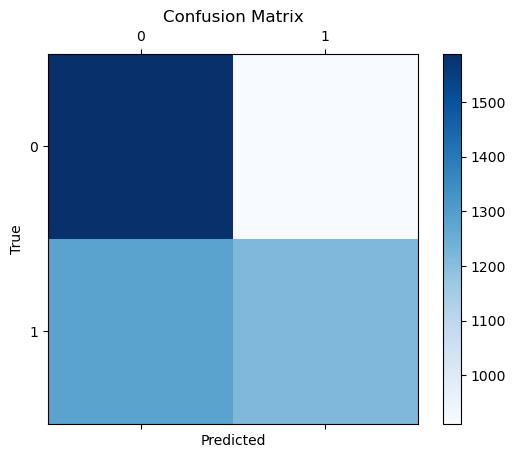

Confusion Matrix:
 [[1588  912]
 [1284 1216]]


In [27]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt

# Predict probabilities for the validation set
predictions = model.predict(validation_features)

# For ROC Curve and AUC, we use the probabilities of the positive class (class 1 - "hate speech")
y_pred_proba = predictions[:, 1]

# Actual validation labels (binary format)
y_true = np.argmax(binary_validation_labels, axis=1)

# Calculate ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Predict classes (instead of probabilities)
y_pred_classes = np.argmax(predictions, axis=1)

# Generate Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot Confusion Matrix
fig, ax = plt.subplots()
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Printing the confusion matrix
print("Confusion Matrix:\n", cm)


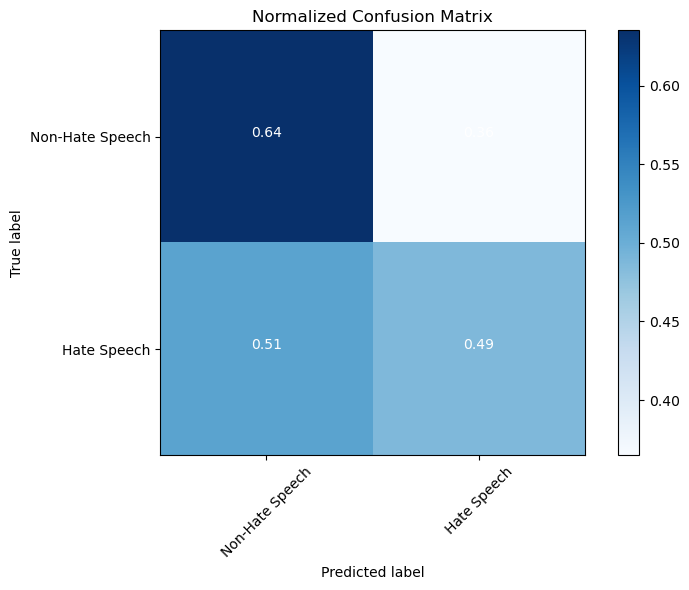

In [28]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalize the confusion matrix
    plt.imshow(cm_normalized, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # Loop over data dimensions and create text annotations.
    fmt = '.2f'
    thresh = cm_normalized.max() / 2.
    for i, j in itertools.product(range(cm_normalized.shape[0]), range(cm_normalized.shape[1])):
        plt.text(j, i, format(cm_normalized[i, j], fmt) if cm_normalized[i, j] != 0 else '0',
                 horizontalalignment="center",
                 color="white" if cm_normalized[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Generate normalized Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
class_names = ['Non-Hate Speech', 'Hate Speech'] 

# Plot normalized Confusion Matrix
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm, classes=class_names, title='Normalized Confusion Matrix')
plt.show()


In [29]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred_classes)
print(f"Accuracy: {accuracy:.4f}")

# Calculate precision, recall, and F1 score
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred_classes, average='binary')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.5608
Precision: 0.5714
Recall: 0.4864
F1 Score: 0.5255
